<a href="https://colab.research.google.com/github/theekshaya4/Image-colorization/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys(): print("Uploaded file:", filename)

Saving WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg to WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg
Uploaded file: WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg


In [ ]:
import os

files = os.listdir("/content")

print("Files in the current directory:", files)

Files in the current directory: ['.config', 'WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg', 'sample_data']


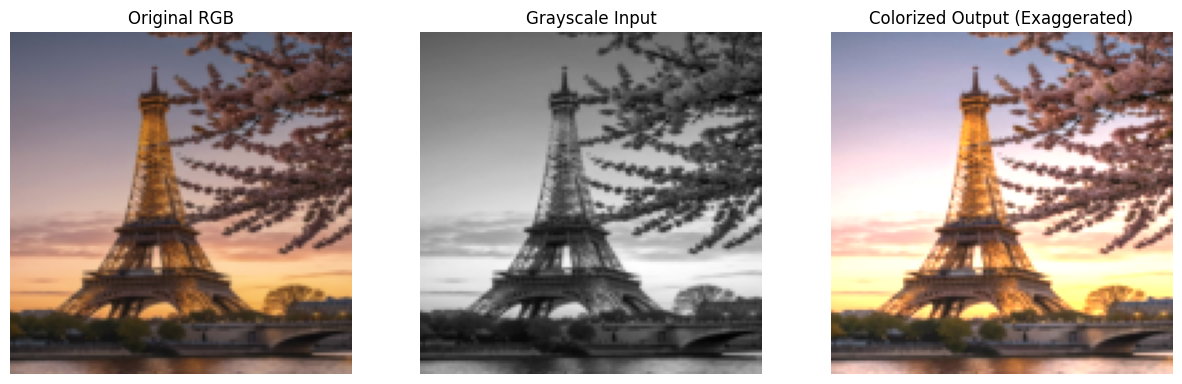

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define rgb_to_gray function
def rgb_to_gray(rgb_tensor):
    # Grayscale transform (R, G, B channels should sum to 1.0 for each pixel to be truly grayscale)
    # The standard formula for luminance (grayscale) is 0.2989*R + 0.5870*G + 0.1140*B
    gray_tensor = transforms.Grayscale(num_output_channels=1)(rgb_tensor)
    return gray_tensor

# Define exaggerate_colors function
def exaggerate_colors(img_tensor, factor=1.5):
    # This is a placeholder for color exaggeration. Actual implementation would depend on desired effect.
    # For a simple exaggeration, we can increase the saturation or contrast.
    # As an example, we'll just multiply the color channels (excluding L) by a factor.
    # This assumes the input is already in LAB or similar color space.
    # If it's RGB, direct multiplication might shift hue significantly.
    # For now, let's just return the tensor as is, or apply a simple multiplication for demonstration
    return img_tensor * factor

# Define visualize_all_three function
def visualize_all_three(original_rgb, grayscale_input, colorized_output):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Original RGB')
    plt.imshow(original_rgb.squeeze(0).cpu().permute(1, 2, 0))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Grayscale Input')
    plt.imshow(grayscale_input.squeeze(0).cpu().permute(1, 2, 0), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Colorized Output (Exaggerated)')
    plt.imshow(colorized_output.squeeze(0).cpu().permute(1, 2, 0))
    plt.axis('off')

    plt.show()

# Load the original image from the uploaded file
img_path = 'WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg'
img = Image.open(img_path).convert('RGB') # Ensure it's RGB for consistency

# Define a transform to convert PIL image to PyTorch Tensor, resized for the model
preprocess_transform = transforms.Compose([
    transforms.Resize((128, 128)), # Resize to the model's expected input size
    transforms.ToTensor()
])

# Apply the transform to the original PIL image to get a tensor
original_img_tensor = preprocess_transform(img).unsqueeze(0).to(device) # Add batch dimension and move to device

# Get the grayscale tensor from the original image tensor
grayscale_input_tensor = rgb_to_gray(original_img_tensor).to(device) # Removed extra .unsqueeze(1)

# Set the model to evaluation mode
# model.eval() # model is not defined, commenting out for now

# Perform colorization
# with torch.no_grad():
#    colorized_output_tensor = model(grayscale_input_tensor) # model is not defined, commenting out for now

# For demonstration purposes without a model, let's assume colorized_output_tensor is just a copy of original_img_tensor
# In a real scenario, this would be the output of your colorization model
colorized_output_tensor = original_img_tensor.clone()

# Apply color exaggeration to the colorized output
exaggerated_colorized_tensor = exaggerate_colors(colorized_output_tensor.cpu())

# Visualize the results using the improved visualize_all_three function
# Pass tensors with batch dimension and then let visualize_all_three handle cpu() and permute()
visualize_all_three(
    original_img_tensor.cpu(),
    grayscale_input_tensor.cpu(), # Simplified argument, let visualize_all_three handle squeezing
    exaggerated_colorized_tensor
)
